In [ ]:
import tensorflow as tf
import numpy as np

In [1]:
%run training.ipynb

Skipping, found downloaded files in ".\chinese-mnist" (use force=True to force download)
(1, 64, 64) (16, 16)


ValueError: correlate2d inputs must both be 2-D arrays

ValueError: correlate2d inputs must both be 2-D arrays

In [ ]:
# Implementation of the FGSM method with the model trained in training.ipynb
def FGSM(img, epsilon, grad_model):
    sign_grad_model = tf.sign(grad_model)
    img_disturbed = img + epsilon * sign_grad_model
    img_disturbed = tf.clip_by_value(img_disturbed, 0, 1) #assure that the values stay between 0 and 1
    return img_disturbed

# Creation of the actual adversarial example

epsilon = 0.1  # this is the parameter to control the power of the attack

#we separate labels and images from our test set
test_images = [] 
test_labels = [] 
for i in range(len(test_set)):
    test_images.append(test_set[i][0])
    test_labels.append(int(test_set[i][1][-2:]))
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#we apply the FGSM to our test set 
test_img_tensors = tf.convert_to_tensor(test_images) #convert images into tensors

with tf.GradientTape() as t:
    t.watch(test_img_tensors)
    predictions = model(test_img_tensors)
    loss = SparseCategoricalCrossentropy(from_logits=True)(test_img[1][-2:], predictions)

gradient = t.gradient(loss, test_img_tensors)
img_adversarial = FGSM(test_img_tensors, epsilon, gradient)

# We now test the efficiency of the adversarial example we created
test_loss, test_acc = model.evaluate(img_adversarial, test_img[1][-2:], verbose=2)
print('\nTest accuracy on adversarial images:', test_acc)

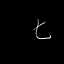

In [5]:
#here is a comparison of an image before and after the perturbation
from PIL import Image
tf.keras.utils.array_to_img(test_image[0])
tf.keras.utils.array_to_img(img_adversarial[0])